In [27]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetProphetTest

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetProphetTest(dir_data=f'{ABS_PATH}/Datasets/compare_prophet.csv',
                                       context=400,
                                       stride=1)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4288/4288 [00:00<00:00, 1124495.16it/s]

len dataset:4288


<Figure size 640x480 with 0 Axes>

In [28]:
def union_vector_predicted_dict(data_predict:dict):
    
    x_concat = data_predict[0]
    
    del data_predict[0]
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        #x_concat = torch.concat((x_concat, data_predict[key]), dim=2)
        x_concat = torch.concat((x_concat, data_predict[key]), dim=2)
        
        del data_predict[key]
    
    return x_concat

In [29]:
data_predict = torch.load(f"../models_h5/generate_evaluate/sintetic_generate_data_LSTM.pt")

In [30]:
data_predict[0].shape

torch.Size([1, 1, 1])

In [31]:
vet_predict = union_vector_predicted_dict(data_predict)

In [32]:
vet_predict[0,400:,0]

tensor([])

## Concat Vets

In [33]:
# x_true, _ = test_loader.dataset[0]

# get_n_elements = len(test_loader.dataset)

# for i in range(1, get_n_elements):
    
#     x_second, _ = test_loader.dataset[i]
    
#     x_true = torch.concat((x_true, x_second), dim=0)
    
x_true = test_dataset.data

x_true.shape, vet_predict.shape

((4688,), torch.Size([1, 1, 4688]))

### First channel

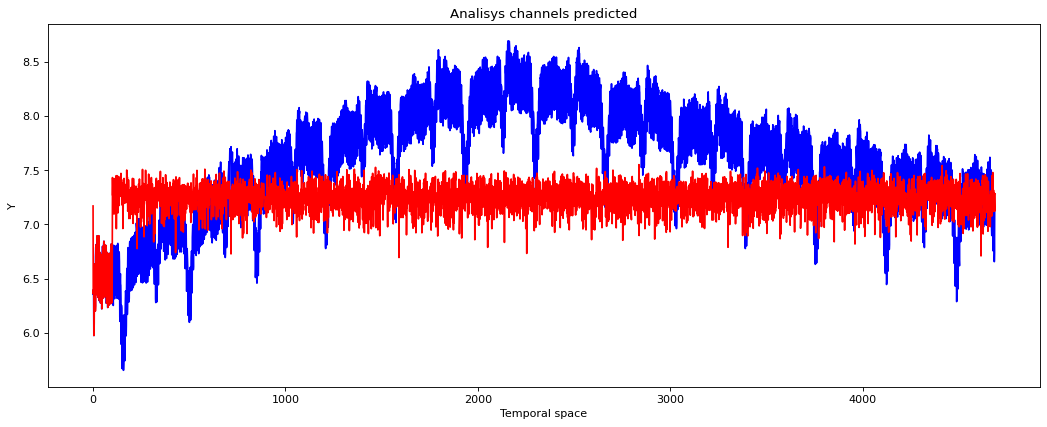

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 0
limiter = init_limiter + 5400

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
# plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
# plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
plt.plot(x_true, color='blue', label='sinal Real')
plt.plot(vet_predict[0,0,:], color='r', label='sinal previsto')


 ...]

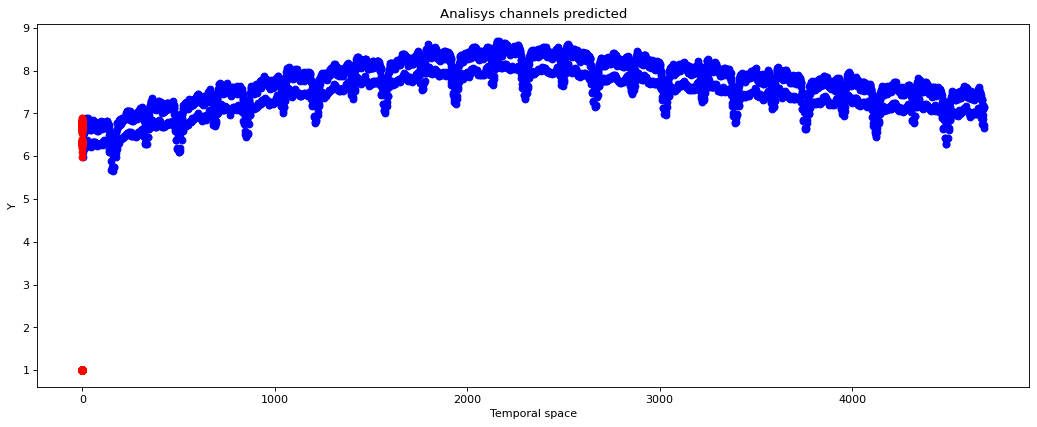

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 0
limiter = init_limiter + 5400

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
# plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
# plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
plt.plot(x_true, "o", color='blue', label='sinal Real')
plt.plot(vet_predict[0], "o", color='r', label='sinal previsto')


In [9]:
abs(x_true[init_limiter:limiter] - vet_predict[0][init_limiter:limiter].numpy())[:100]

array([[1.03936004e+00, 1.01671668e+00, 9.98559362e-01, ...,
        6.57510877e-01, 2.41982951e-01, 2.56998258e-01],
       [3.04698133e-09, 2.26433709e-02, 4.08006847e-02, ...,
        3.81849169e-01, 7.97377095e-01, 7.82361788e-01],
       [2.26435631e-02, 1.95198231e-07, 1.81571185e-02, ...,
        3.59205603e-01, 7.74733529e-01, 7.59718222e-01],
       ...,
       [3.17687985e-01, 2.95044617e-01, 2.76887304e-01, ...,
        6.41611811e-02, 4.79689107e-01, 4.64673800e-01],
       [7.43951828e-02, 9.70385507e-02, 1.15195864e-01, ...,
        4.56244349e-01, 8.71772275e-01, 8.56756968e-01],
       [7.89814026e-02, 1.01624770e-01, 1.19782084e-01, ...,
        4.60830569e-01, 8.76358495e-01, 8.61343188e-01]])

In [10]:
type(x_true[init_limiter:limiter, feature_channel])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed